In [57]:
import matplotlib.pyplot as plt
import numpy as np
import glob
from scipy.interpolate import RegularGridInterpolator
import pickle

In [3]:
datdir = './data/'
npzfiles = glob.glob(datdir+'*.npz')
npzfiles.sort()
npzfiles[0:4]

['./data/run_0.npz',
 './data/run_1.npz',
 './data/run_10.npz',
 './data/run_100.npz']

In [4]:
pk_max = 1e2
kk = np.logspace(-4, np.log10(pk_max), 500)

In [5]:
pks = []
T_recs = []
A_recs = []
T_A_recs = []
for npzfile in npzfiles:
    data = np.load(npzfile)
    pk = data['Pk']
    pks.append(pk)
    T_recs.append(data['T_rec'].item())
    A_recs.append(data['A_rec'].item())
    T_A_recs.append((data['T_rec'].item(),data['A_rec'].item()))

In [6]:
#Returns sorted unique list of each
T_recs_unique = np.unique(T_recs)
A_recs_unique = np.unique(A_recs)

#Create pk grid
pk_dat = np.zeros((len(T_recs_unique), len(A_recs_unique), len(kk)))

In [7]:
#populate pk grid such that pk is a function of T_rec and A_rec
pk_dat = np.zeros((len(T_recs_unique), len(A_recs_unique), len(kk)))
for i, T in enumerate(T_recs_unique):
    for j, A in enumerate(A_recs_unique):
        pk_dat[i, j, :] = pks[T_A_recs.index((T, A))]

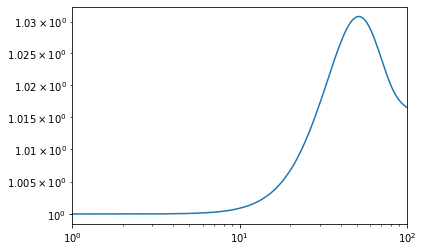

In [8]:
plt.plot(kk,pk_dat[0, 0, :]/pk_dat[20, 20, :])
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e0,1e2)
plt.show()

## Interpolation

In [9]:
# Create grid for interpolater
T_recsg, A_recsg, kkg = np.meshgrid(T_recs_unique, A_recs_unique, kk, indexing='ij')
pks_interp = RegularGridInterpolator((T_recs_unique, A_recs_unique, kk), pk_dat)

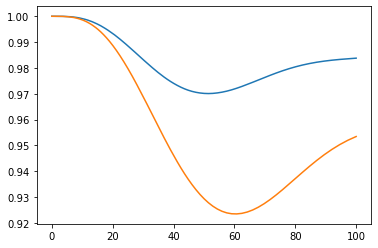

In [16]:
idx = 20
plt.plot(kk, pk_dat[idx,idx,:]/pk_dat[0,0,:], label='data1')
plt.plot(kk, pk_dat[idx+1,idx+1,:]/pk_dat[0,0,:], label='data2')

num_interps = 5
T_interps = np.logspace(np.log10(T_recs_unique[idx]), np.log10(T_recs_unique[idx+1]), num_interps)
A_interps = np.logspace(np.log10(A_recs_unique[idx]), np.log10(A_recs_unique[idx+1]), num_interps)

In [27]:
pks_interp((T_interps[0], A_interps[0], kk[0]))

array(460.56989518)

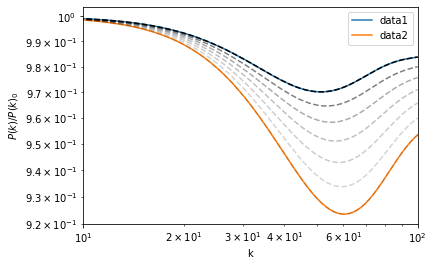

In [58]:
idx = 20
plt.plot(kk, pk_dat[idx,idx,:]/pk_dat[0,0,:], label='data1')
plt.plot(kk, pk_dat[idx+1,idx+1,:]/pk_dat[0,0,:], label='data2')

num_interps = 7
T_interps = np.logspace(np.log10(T_recs_unique[idx]), np.log10(T_recs_unique[idx+1]), num_interps)
A_interps = np.logspace(np.log10(A_recs_unique[idx]), np.log10(A_recs_unique[idx+1]), num_interps)

for num_interp in range(num_interps):
    plt.plot(kk, pks_interp((T_interps[num_interp], A_interps[num_interp], kk))/pk_dat[0,0,:],'--k', alpha=1/(num_interp+1))
# plt.plot(kk, pks_interp((T_recs_unique[0], A_recs_unique[0], kk)),'--', label='interp2')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e1,1e2)
# plt.ylim(1e-7,1e0)
plt.xlabel('k')
plt.ylabel('$P(k)/P(k)_0$')
plt.legend()
# plt.savefig('figures/pk_interp.png')
plt.show()

In [46]:
def dmu_idm_dr(T_rec, A_rec, z, a_idm_dr=1, nindex_idm_dr=4, omega0_cdm=0.12038, f_idm_dr=1.0, h=0.67556, xi=0.3):

    base_rate = (a_idm_dr * ((1+z)/(1e7))**nindex_idm_dr * omega0_cdm*f_idm_dr * h**2)
    T_idr = 2.7255 * xi
    if T_rec > T_idr * (1+z):
        return base_rate * (1 + A_rec)
    else:
        return base_rate

In [51]:
np.logspace(-3,3,7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

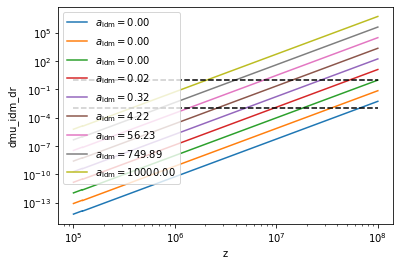

In [56]:
zs = np.logspace(5,8,5000)
for a in np.logspace(-5,4,9):
    dmus = [dmu_idm_dr(T_recs_unique[0], A_recs_unique[0], z, a_idm_dr=a) for z in zs] 
    plt.plot(zs, dmus, label=r'$a_\mathrm{idm} = %.2f$'%a)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('dmu_idm_dr')
plt.plot(np.logspace(5,8,100),1e-3*np.ones(100), '--k')
plt.plot(np.logspace(5,8,100),np.ones(100), '--k')
plt.legend()
plt.show()

## sd interp

In [65]:
data_sd_dir = "./data_sd/"
npz_sd_files = glob.glob(data_sd_dir + "*.npz")
npz_sd_files.sort()

In [66]:
pks_sd = []
a_idm_drs = []
for npzfile in npz_sd_files:
    data = np.load(npzfile)
    pk = data["Pk"]
    pks_sd.append(pk)
    a_idm_drs.append(data["a_idm_dr"])

a_idm_drs_unique = np.unique(a_idm_drs)

In [67]:
pk_sd_dat = np.zeros((len(a_idm_drs), len(kk)))
for i, a_idm_dr in enumerate(a_idm_drs_unique):
    pk_sd_dat[i, :] = pks_sd[a_idm_drs.index(a_idm_dr)]

In [68]:
pks_sd_interp = RegularGridInterpolator((a_idm_drs_unique, kk), pk_sd_dat)

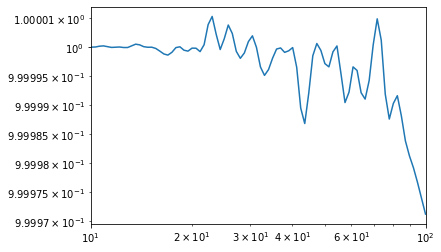

In [76]:
plt.plot(kk, pks_sd_interp((a_idm_drs_unique[0], kk))/pks_sd_interp((a_idm_drs_unique[-1], kk)))
# plt.plot(kk, pks_sd_interp((a_idm_drs_unique[-1], kk)),'--')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e1,1e2)
plt.show()

## Pickle Interpolation

In [59]:
pickle.dump(pks_interp, open('interps/pks_interp.p','wb'))

In [60]:
interp2 = pickle.load(open('interps/pks_interp.p','rb'))

In [16]:
print(data.files)

['zs', 'Pk', 'dmu_idm_dr']


In [46]:
filenames = glob.glob(datdir+'phase*_pk.dat')

In [47]:
filenames[0]

'./output/phase_transition00_pk.dat'

TypeError: can only concatenate list (not "str") to list

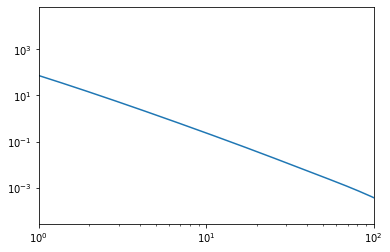

In [41]:
data = np.loadtxt(filename[0])
plt.plot(data[:,0],data[:,1])
plt.yscale('log')
plt.xscale('log')
plt.xlim(1,1e2)
plt.savefig(filename+'.png')

array([[1.04504540e-05, 5.24701045e+01],
       [2.33441383e-05, 1.13671401e+02],
       [3.62832291e-05, 1.73729445e+02],
       ...,
       [1.36895140e+02, 1.19000660e-04],
       [1.45006688e+02, 9.35502964e-05],
       [1.53598874e+02, 7.26284904e-05]])